In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
#import the data set into a variable which we can use 
df = pd.read_csv("autos.csv", header=0, sep=',', encoding='Latin1',)

In [3]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [4]:
#print the column names for having a breif idea about the data,
#via shape and noumber of rows and columns
print(df.columns ,df.shape)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object') (371528, 20)


In [5]:
#P R E -  P R O C E S S I N G
#print al the different sellers
print(df.seller.value_counts())

privat        371525
gewerblich         3
Name: seller, dtype: int64


In [6]:
#remove the seller type having only 3 cars
df[df.seller != 'gewerblich']

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [7]:
#now all the sellers are same so we can get rid of this column
df=df.drop('seller',1)

In [8]:
#print al the different sellers
print(df.offerType.value_counts())

Angebot    371516
Gesuch         12
Name: offerType, dtype: int64


In [9]:
#remove the Offer Type having only 12 listings
df[df.offerType != 'Gesuch']

,dateCrawled,name,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [10]:
#now all the offers are same so we can get rid of this column
df=df.drop('offerType',1)

In [11]:
#Cars having power less than 50ps and above 900ps seems a little suspicious,
#let's remove them and see what we've got now
print(df.shape)

(371528, 18)


In [12]:
df = df[(df.powerPS > 50) & (df.powerPS < 900)]
print(df.shape)

(319709, 18)


In [13]:
#around 50000 cars ahave been removed which could have inrouduced error to our data

In [14]:
#simlarly, filtering our the cars having registeration years not in the mentioned range
#print(df.shape)
df = df[(df.yearOfRegistration >= 1950) & (df.yearOfRegistration < 2017)]
print(df.shape)

(309171, 18)


In [15]:
# not much of a difference but still, 10000 rows have been reduced. it's better to 
#get rid of faulty data instead of keeping them just to increase the size.

#removing irrelevant columns which are either the same for all the cars in teh dataset, or can
#introduce bias, so removing them too.
df.drop(['name','abtest', 'dateCrawled', 'nrOfPictures', 'lastSeen',
         'postalCode', 'dateCreated'], axis='columns', inplace=True)

In [16]:
#final data that we have now
print(df.shape)

(309171, 11)


In [17]:
#dropping the duplicates from the dataframe and stroing it in a new df.
#here all rows having same value in all the mentioned columns will be deleted and by default,
#only first occurance of anysuch row is kept
new_df = df.copy()
new_df = new_df.drop_duplicates(['price','vehicleType','yearOfRegistration'
                         ,'gearbox','powerPS','model','kilometer','monthOfRegistration','fuelType'
                         ,'notRepairedDamage'])

In [18]:
#after removing duplicates
print(new_df.shape)

(285145, 11)


In [19]:
#As the dataset contained some german words for many features, cahnging them to english
new_df.gearbox.replace(('manuell', 'automatik'), ('manual','automatic'), inplace=True)
new_df.fuelType.replace(('benzin','andere','elektro'),('petrol','others','electric'),inplace=True)
new_df.vehicleType.replace(('kleinwagen', 'cabrio','kombi','andere'),
                           ('small car','convertible','combination','others'),inplace=True)
new_df.notRepairedDamage.replace(('ja','nein'),('Yes','No'),inplace=True)

In [20]:
#### Removing the outliers
new_df = new_df[(new_df.price >= 100) & (new_df.price <= 150000)]

In [21]:
#Filling NaN values for columns whose data might not be there with the information provider,
#which might lead to some variance but our model
#but we will still be able to give some estimate to the user
new_df['notRepairedDamage'].fillna(value='not-declared', inplace=True)
new_df['fuelType'].fillna(value='not-declared', inplace=True)
new_df['gearbox'].fillna(value='not-declared', inplace=True)
new_df['vehicleType'].fillna(value='not-declared', inplace=True)
new_df['model'].fillna(value='not-declared', inplace=True)

In [22]:
#can save the csv for future purpose. 
new_df.to_csv("autos_preprocessed.csv")

In [23]:
#Columns which contain categorical values, which we'll need to convert via label encoding
labels = ['gearbox', 'notRepairedDamage', 'model', 'brand', 'fuelType', 'vehicleType']

In [24]:
#looping over the labels to do the label encoding for all at once and 
#saving the LABEL ENCODING FILES
mapper = {}
for i in labels:
    mapper[i] = LabelEncoder()
    mapper[i].fit(new_df[i])
    tr = mapper[i].transform(new_df[i])
    np.save(str('classes'+i+'.npy'), mapper[i].classes_)
    print(i,":",mapper[i])
    new_df.loc[:, i + '_labels'] = pd.Series(tr, index=new_df.index)

gearbox : LabelEncoder()
notRepairedDamage : LabelEncoder()
model : LabelEncoder()
brand : LabelEncoder()
fuelType : LabelEncoder()
vehicleType : LabelEncoder()


In [25]:
#Final data to be put in a new dataframe called "LABELED",
labeled = new_df[ ['price'
                        ,'yearOfRegistration'
                        ,'powerPS'
                        ,'kilometer'
                        ,'monthOfRegistration'
                        ] 
                    + [x+"_labels" for x in labels]]

print(labeled.columns)

Index(['price', 'yearOfRegistration', 'powerPS', 'kilometer',
       'monthOfRegistration', 'gearbox_labels', 'notRepairedDamage_labels',
       'model_labels', 'brand_labels', 'fuelType_labels',
       'vehicleType_labels'],
      dtype='object')


In [26]:
#Train-Test Split
#Storing price in Y and rest of the data in X
Y = labeled.iloc[:,0].values
X = labeled.iloc[:,1:].values

In [27]:
#need to reshape the Y values
Y = Y.reshape(-1,1)

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 3)

In [29]:
#Model building and Fitting
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
regressor = RandomForestRegressor(n_estimators=1000,max_depth=10,random_state=34)

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
#fitting the model
regressor.fit(X_train, np.ravel(Y_train,order='C'))

RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=34)

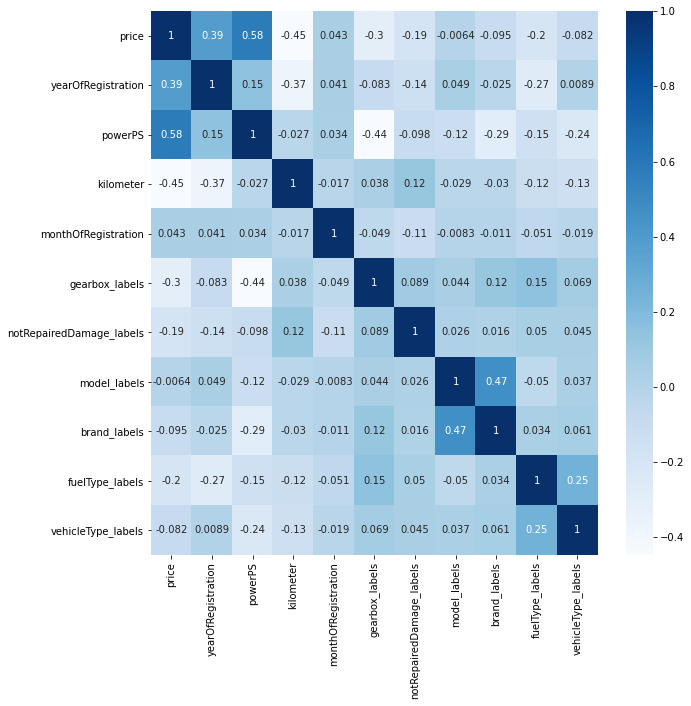

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(new_df.corr(), annot=True, cmap='Blues')

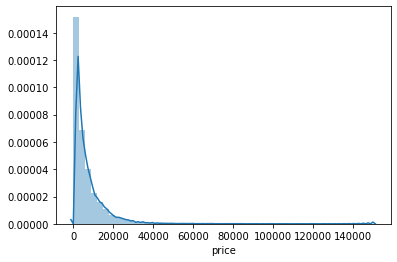

In [33]:
sns.distplot(new_df['price'])

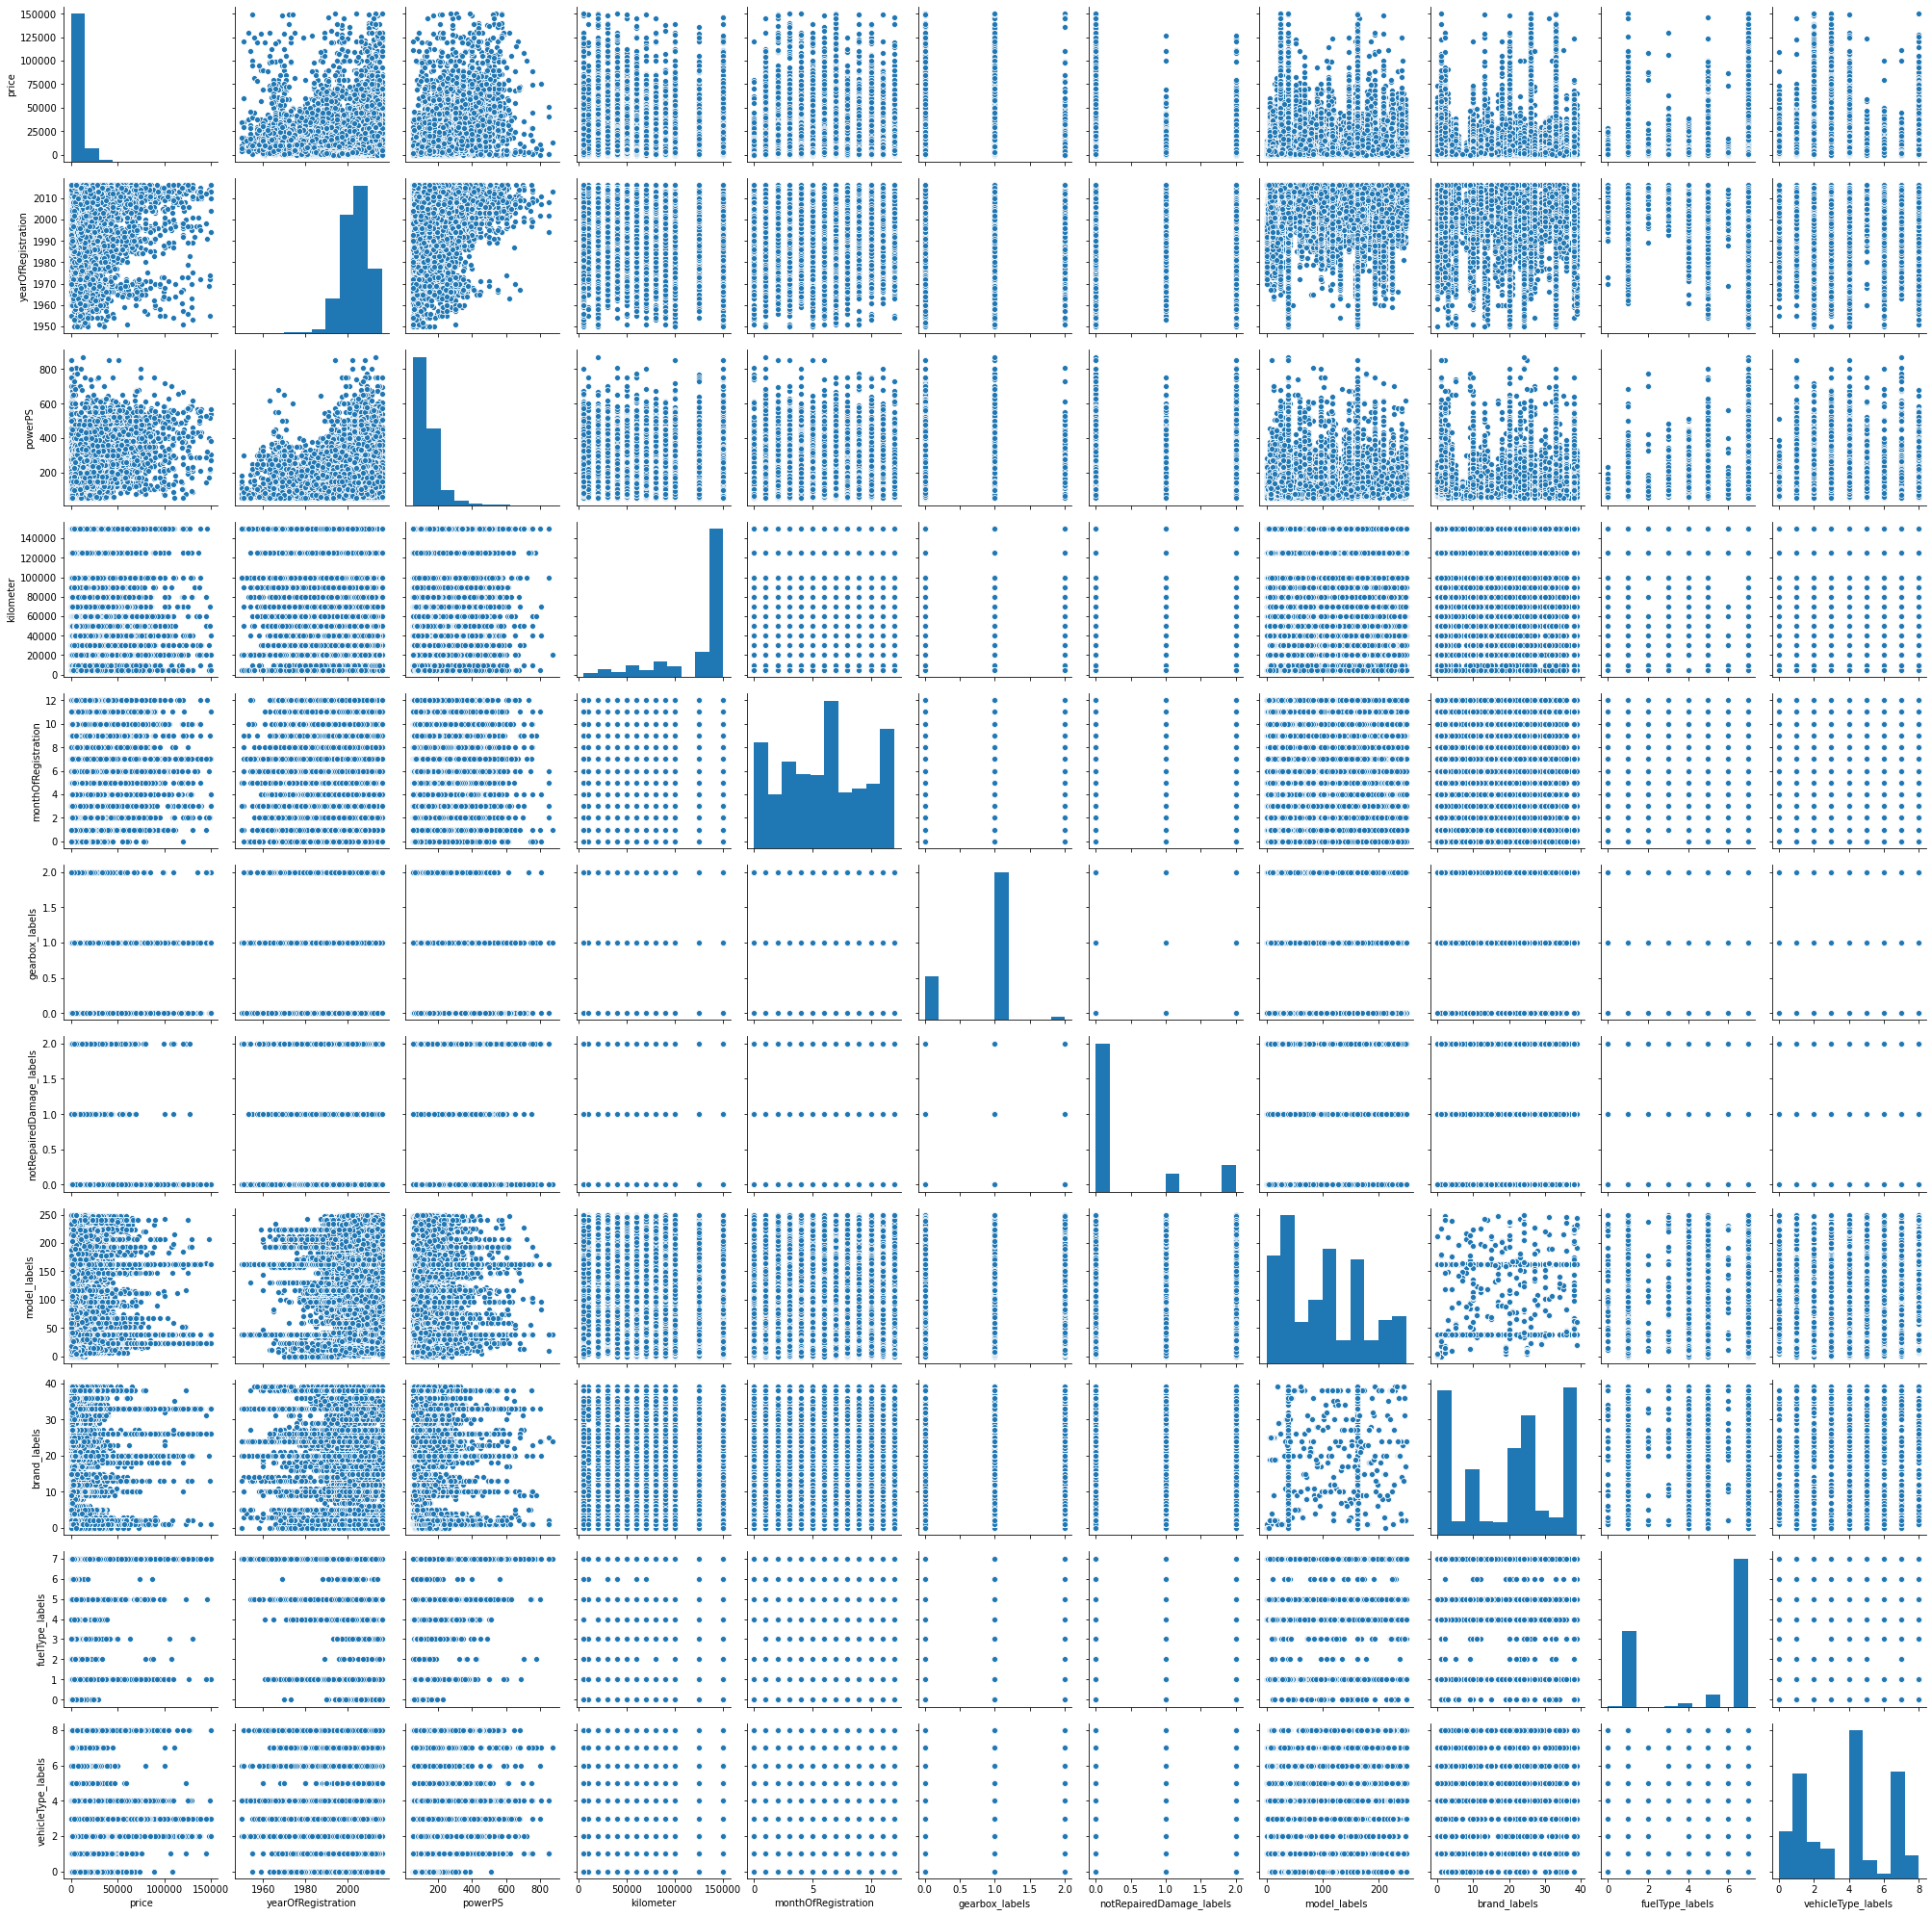

In [34]:
sns.pairplot(new_df)
plt.show()

No handles with labels found to put in legend.


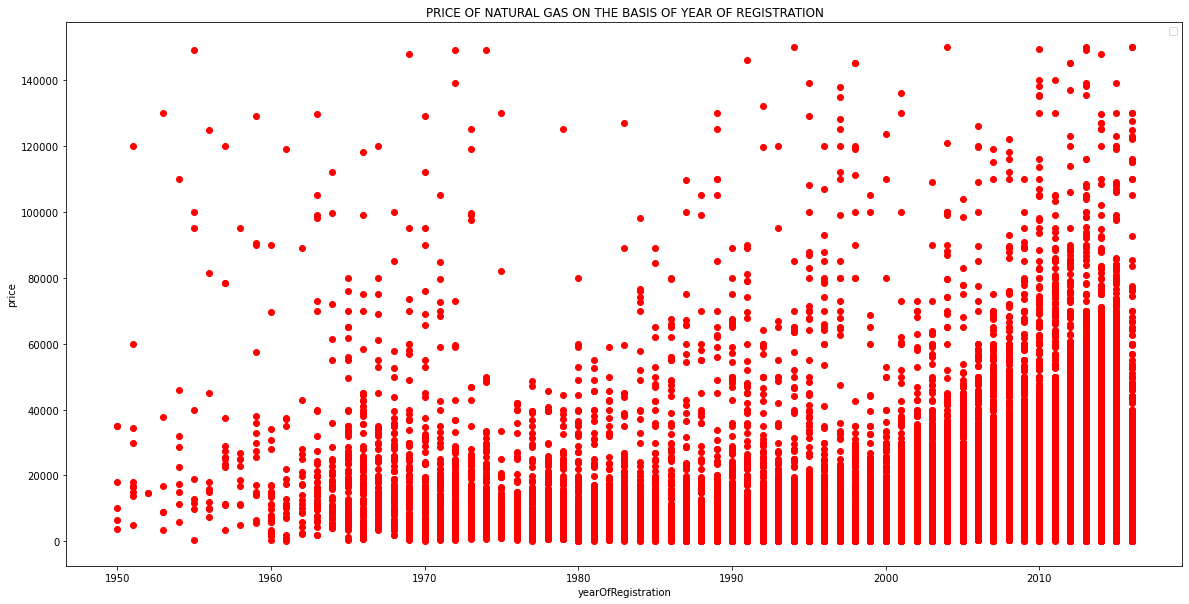

In [35]:
fig=plt.figure(figsize=(20,10))
plt.scatter(new_df['yearOfRegistration'],new_df['price'],color='red')
plt.xlabel('yearOfRegistration')
plt.ylabel('price')
plt.title("PRICE OF NATURAL GAS ON THE BASIS OF YEAR OF REGISTRATION")
plt.legend()

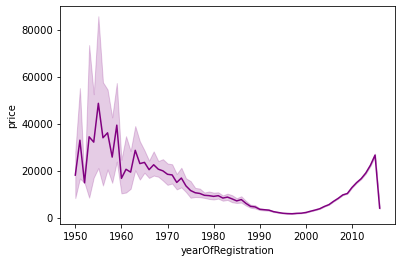

In [36]:
sns.lineplot(x='yearOfRegistration',y='price',data=new_df,color='purple')

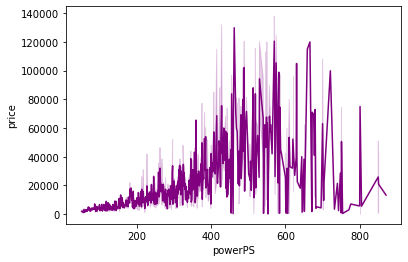

In [37]:
sns.lineplot(x='powerPS',y='price',data=new_df,color='purple')

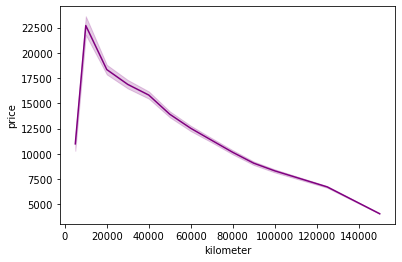

In [38]:
sns.lineplot(x='kilometer',y='price',data=new_df,color='purple')

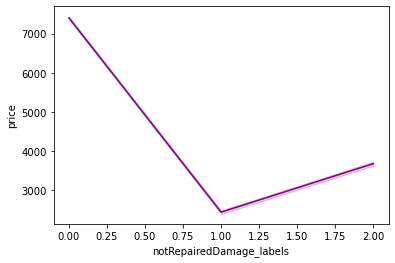

In [39]:
sns.lineplot(x='notRepairedDamage_labels',y='price',data=new_df,color='purple')

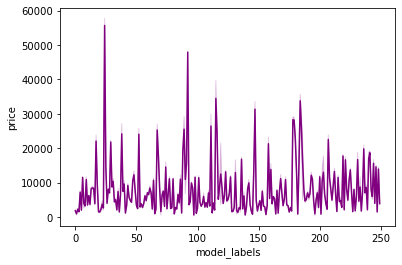

In [40]:
sns.lineplot(x='model_labels',y='price',data=new_df,color='purple')

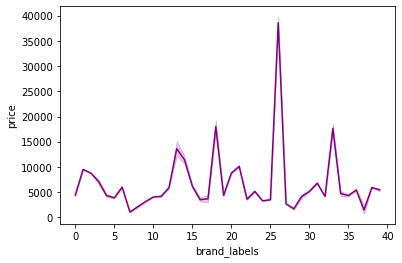

In [41]:
sns.lineplot(x='brand_labels',y='price',data=new_df,color='purple')

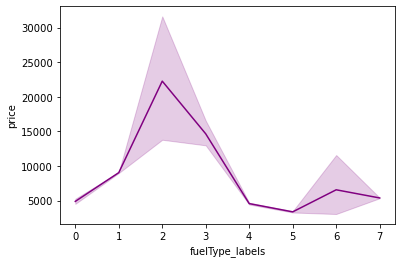

In [42]:
sns.lineplot(x='fuelType_labels',y='price',data=new_df,color='purple')

<Figure size 1080x1080 with 0 Axes>

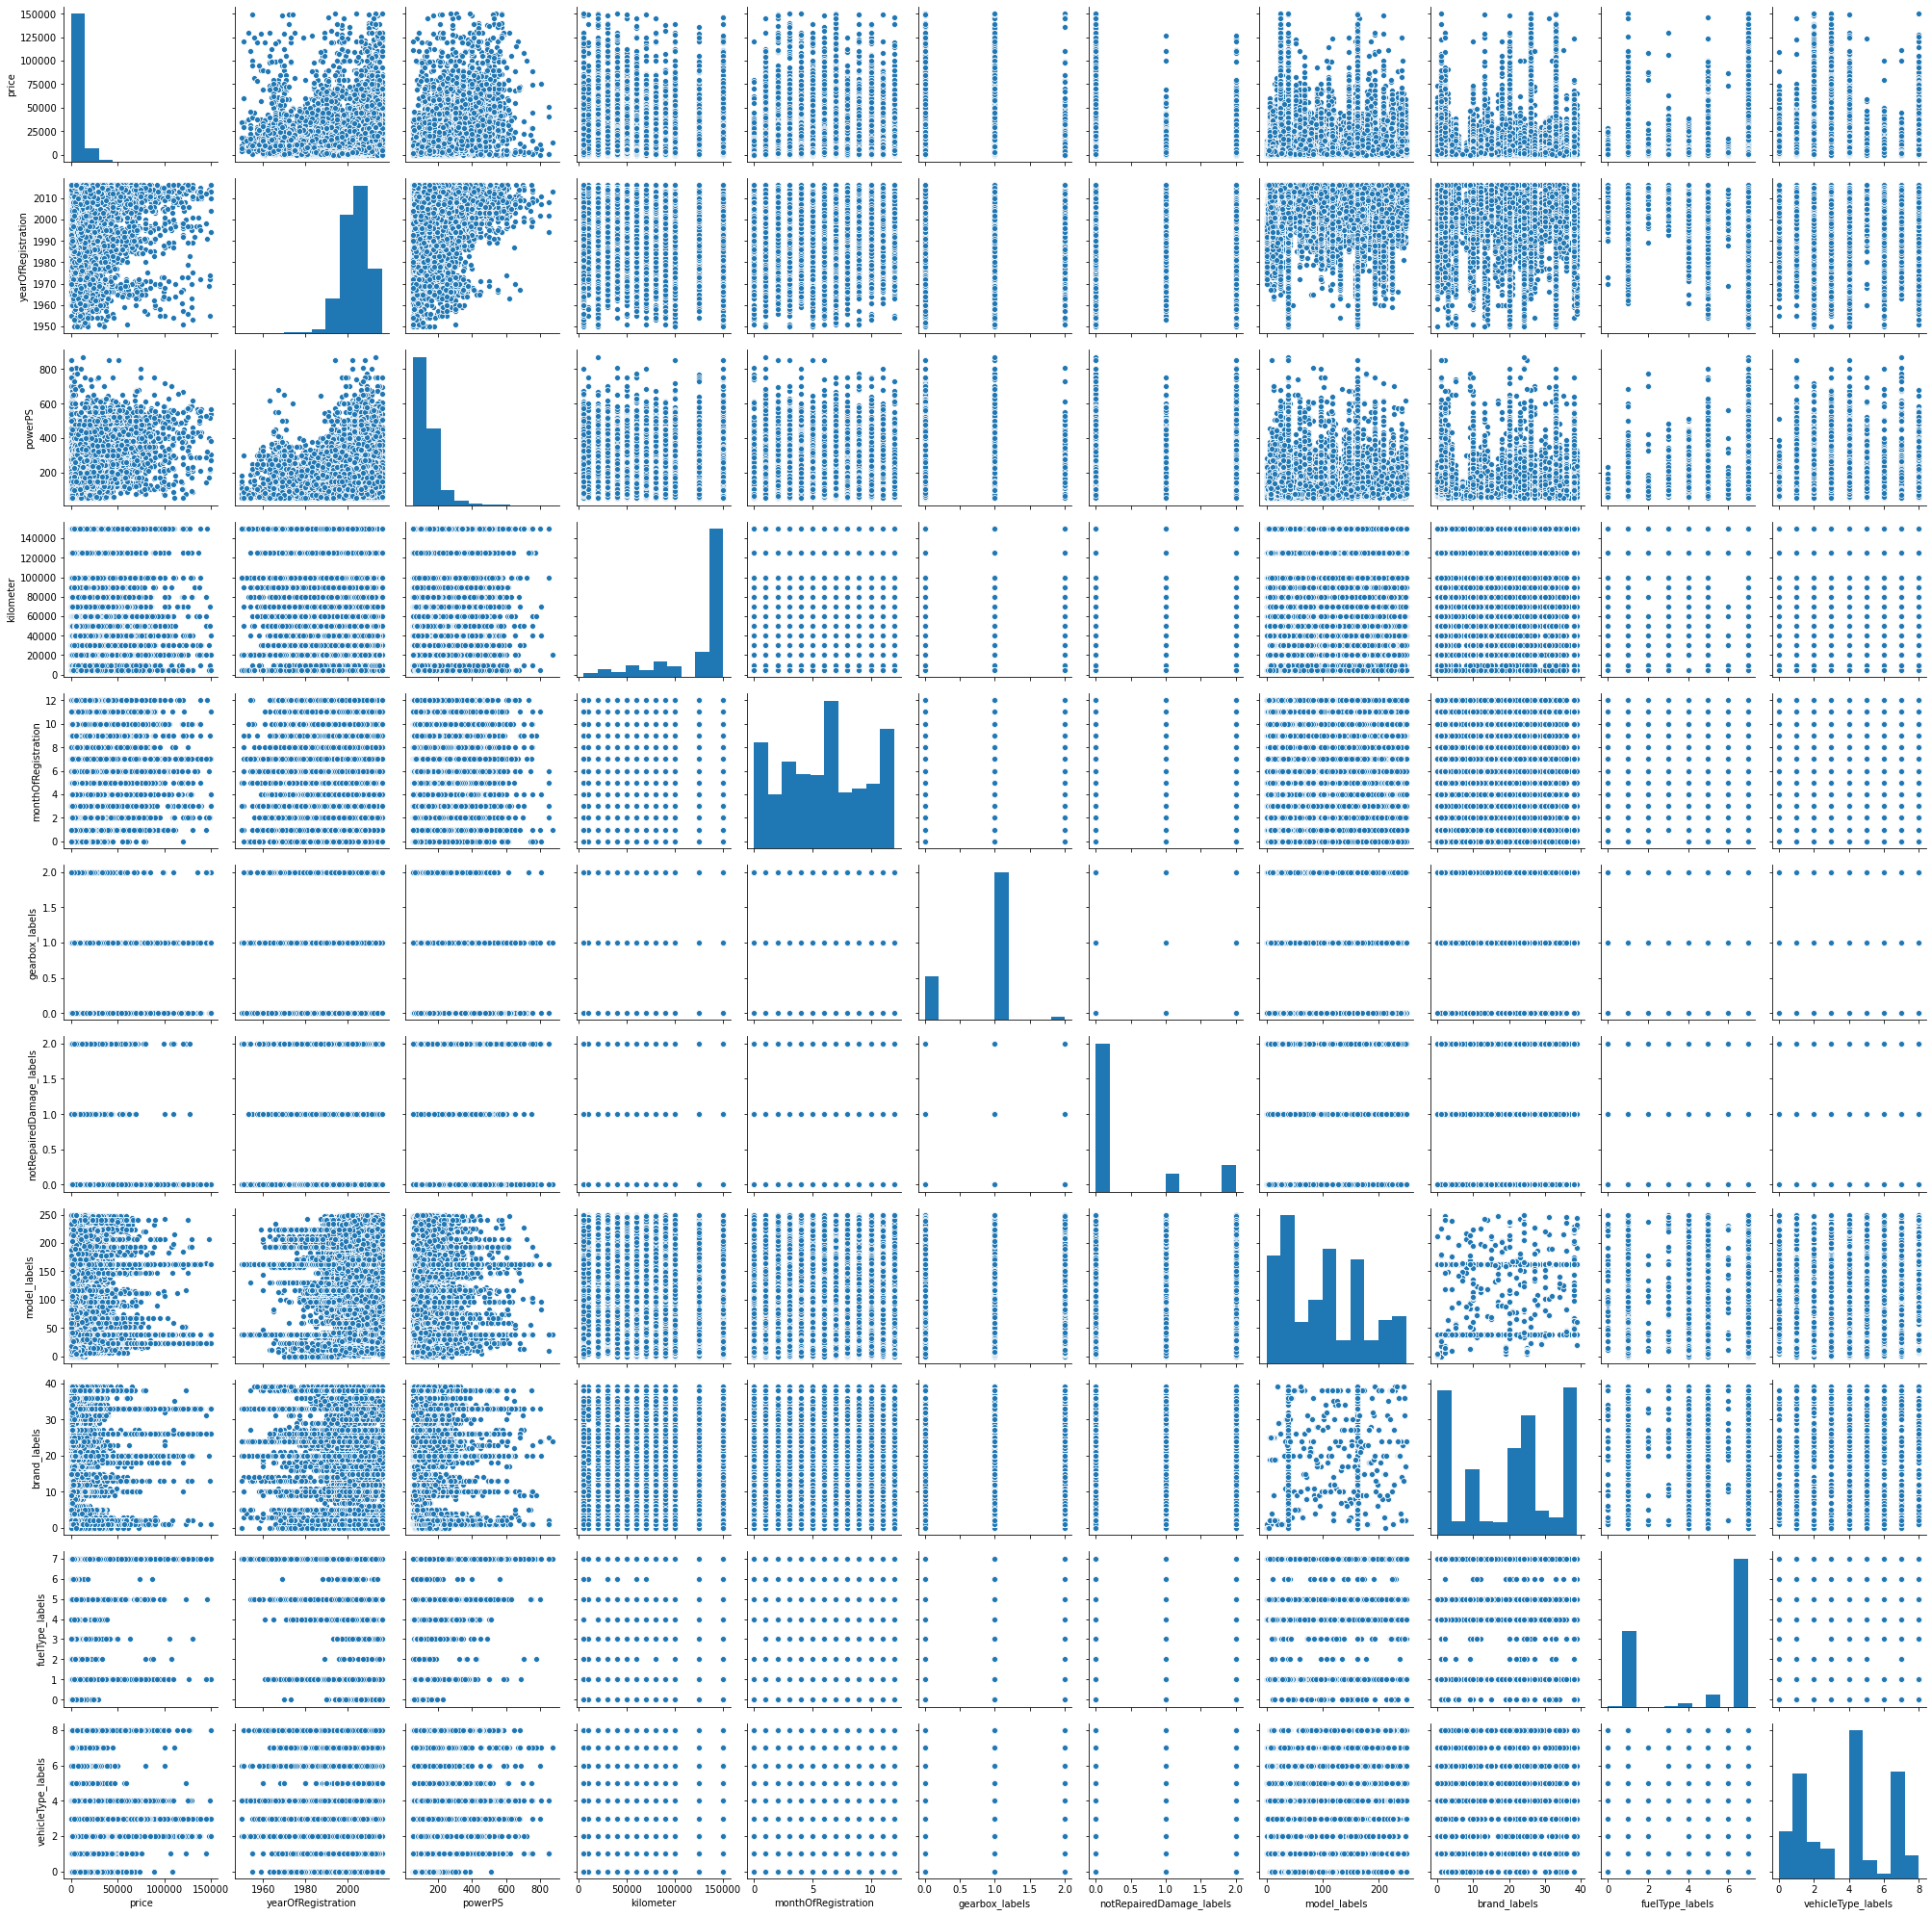

In [43]:
plt.figure(figsize=(15, 15))
sns.pairplot(new_df)
plt.show()

In [44]:
#predicting the values fo test test
y_pred = regressor.predict(X_test)

In [45]:
#printing the Accuraccy for test set
print(r2_score(Y_test,y_pred))

0.834527626497731


In [46]:
#for testing on user input values
y_pred1 = regressor.predict([[2011,190,125000,5,1,0,163,1,3,3]])
#predticting price for a user input values
print(y_pred1)

[19559.28944983]


In [47]:
#saving the model for future use.
filename = 'resale_model.sav'
pickle.dump(regressor, open(filename, 'wb'))